<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [51]:
import pandas as pd

Load the dataset into a dataframe.


In [52]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


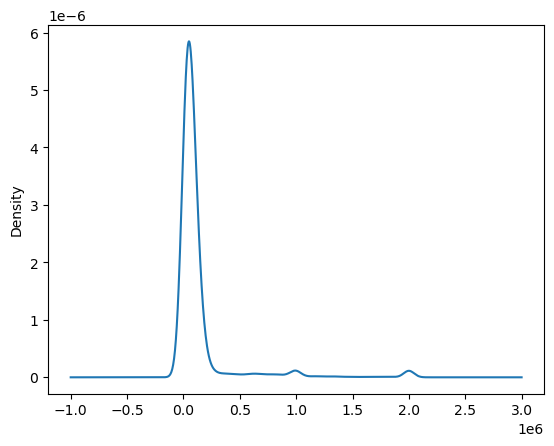

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
kde = df['ConvertedComp'].plot.kde()
plt.show()# your code goes here


Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'ConvertedComp')

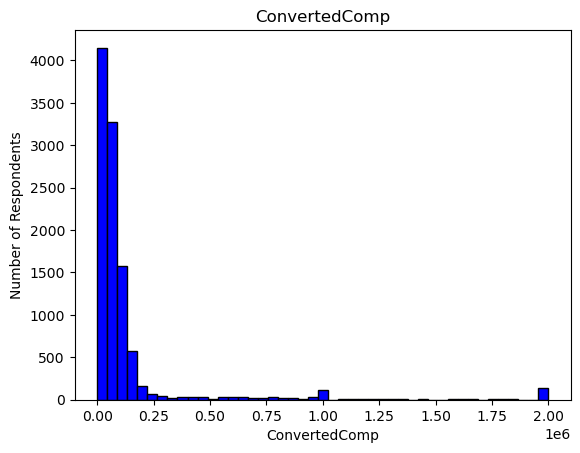

In [54]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100
from IPython.core.pylabtools import figsize

plt.hist(df['ConvertedComp'], color='blue', edgecolor='black', bins=int(45/1))
plt.xlabel('ConvertedComp')
plt.ylabel('Number of Respondents')
plt.title('ConvertedComp')# your code goes here


What is the median of the column `ConvertedComp`?


In [55]:
df['ConvertedComp'].median()# your code goes here


57745.0

How many responders identified themselves only as a **Man**?


In [56]:
count_men = len(df[(df['Gender'] == 'Man')])
count_men# your code goes here


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [57]:
women = df.loc[df['Gender'] == 'Woman']
women['ConvertedComp'].median()# your code goes here


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [59]:
minimum = df['Age'].min()
q1 = np.percentile(df['Age'], 25)
median = df['Age'].median()
q3 = np.percentile(df['Age'], 75)
maximum = df['Age'].max()
print(minimum, q1, median, q3, maximum)# your code goes here


16.0 nan 29.0 nan 99.0


Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Age of Respondents')

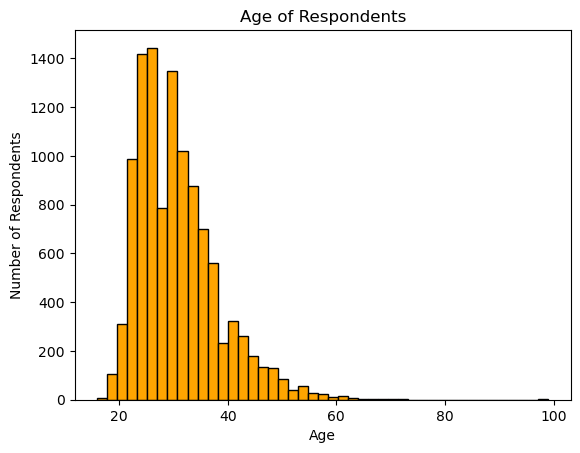

In [60]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100
 
from IPython.core.pylabtools import figsize
plt.hist(df['Age'], color='orange', edgecolor='black', bins=int(45/1))
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Age of Respondents')# your code goes here


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

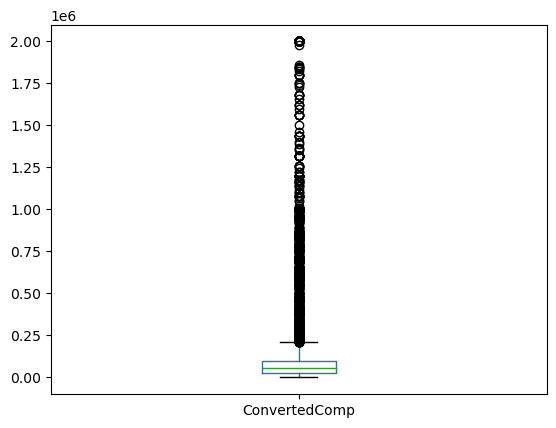

In [61]:
df.boxplot(column =['ConvertedComp'], grid = False)# your code goes here


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [62]:
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)# your code goes here


73132.0


Find out the upper and lower bounds.


In [63]:
q1= df['ConvertedComp'].quantile(q=0.25)
q3= df['ConvertedComp'].quantile(q=0.75)  
iqr= q3 - q1   
lower = (q1 - 1.5*iqr) 
upper = (q3 + 1.5*iqr) 
print(lower,upper)# your code goes here


-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [64]:
((df['ConvertedComp'] < (df['ConvertedComp'].quantile(0.25) - 1.5 * (df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)))) | (df['ConvertedComp'] > (df['ConvertedComp'].quantile(0.75) + 1.5 * (df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25))))).sum()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [75]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)
df1 = df[~outliers].dropna()
df1.tail() 
# your code goes here


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
11320,24975,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,39.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11321,24977,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed part-time,Netherlands,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,33.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11324,24985,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed part-time,Netherlands,"Yes, part-time",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,20.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
11345,25022,"I am not primarily a developer, but I write co...",Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,46.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11384,25118,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [76]:
df2 = df.select_dtypes(include=np.number)
corr_df2 = df2.corr()['Age']
corr_df2# your code goes here


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
